# Открытие и изучение датасетов

In [1]:
#Подключаем библиотеки
import pandas as pd
from IPython.display import display
from IPython.display import display, HTML
import datetime
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import pearsonr

sns.set()
sns.set_palette("deep") # палитра
sns.set_style("whitegrid", {'axes.spines.left': False,
                            'axes.spines.bottom': False,
                            'axes.spines.right': False,
                            'axes.spines.top': False}) # стиль графиков в отчете

Не увидел сразу ссылку. но нас же научили скачивать датасеты))

In [2]:
#Подключим датасеты
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')
    client = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_clients.csv')
except:
    df = pd.read_csv('telecom_dataset.csv')
    client = pd.read_csv('telecom_clients.csv')
    

In [3]:
#Смотрим наши датасеты
display(df.info())
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [4]:
#Посмотирм распределение 
df.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


In [5]:
# Смотрим открытый датасет telecom_dataset.csv
df.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [6]:
# # Смотрим открытый датасет telecom_client.csv
client.head(5)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [7]:
#Пропуски  в датасете df в процентах 
(df.isna().sum() / len(df)) * 100

user_id                 0.000000
date                    0.000000
direction               0.000000
internal                0.217061
operator_id            15.160847
is_missed_call          0.000000
calls_count             0.000000
call_duration           0.000000
total_call_duration     0.000000
dtype: float64

In [8]:
#Пропуски  в датасете сlietn
client.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [9]:
#Количество дубликатов в датасете df
duplicat = df.duplicated().sum()
duplicat

4900

In [10]:
#Считаем количество дубликавов в процентах 
round((duplicat / len(df)) * 100, 2)

9.09

In [11]:
#Количество дубликатов в датасете client
client.duplicated().sum()

0

## Выводы 

**Отрыли данные и провели первичный осмотр**

 - Надо заменить типы данных в  date на datetime, internal на bool, operator_id на int.
 
 - Есть пропуски в нашем датасете internal  0.21% и operator_id 15.16 % от общего количества
 
 - Также были найтеды дубликаты в количестве 4900 шт или 9% от отбщего обьема данных 
 
 - df.describe() выявил что есть клиент с количеством звонков 4817 шт, также есть клиент который наговорил без ожидания 40 часов, с ожаданием 46 часов
                                
                             

# Предобработка данных

In [12]:
#Сохраним сырыеу данныe
df_raw = len(df)

## Приводим секунды в call_duration и total_call_duration к минутам

In [13]:
# Приведем call_duration и total_call_duration к минутам 
df['call_duration'] = df['call_duration'] / 60
df['total_call_duration'] = df['total_call_duration'] / 60
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0.000000,0.066667
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0.000000,0.083333
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0.000000,0.016667
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,0.166667,0.300000
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0.000000,0.416667


## Дубликат в датасеет df 

In [14]:
# Проверка наличия дубликатов во всем датасете
duplicates = df.duplicated()
duplicated_rows = df[duplicates]
duplicated_rows

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0.000000,0.833333
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0.000000,0.566667
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,26.116667,27.566667
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0.000000,0.050000
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,23.550000,24.550000
...,...,...,...,...,...,...,...,...,...
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,20.483333,21.366667
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,8.983333,9.366667
53875,168601,2019-11-26 00:00:00+03:00,in,False,NaN,True,3,0.000000,0.583333
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0.000000,1.483333


In [15]:
#Удаляем и проверяем на количество явных дубликатов
df = df.drop_duplicates()
df.duplicated().sum()

0

In [16]:
# ячейка тимлида: в начале смотрим на данные, которые содержат дубликаты:
tmp = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')

# посмотрим на особенности данных, содержащие дубликаты:
(tmp[tmp.duplicated() == True] # оставляем только дубликаты
 .groupby(['is_missed_call','direction','internal']) # группируем по важным признакам
 .agg({'user_id':'nunique','calls_count':'sum','total_call_duration':'sum'}) # подсчитываем ключевые метрики
 .assign(calls_share = lambda x: x['calls_count'] / tmp[tmp.duplicated() == True].calls_count.sum()) # смотрим на доли по различным признакам
)

user_id  calls_count  total_call_duration  \
is_missed_call direction internal                                              
False          in        False         200         9831              1147031   
                         True           14           41                 2577   
               out       False         162        33110              3731852   
                         True           34          672                50826   
True           in        False         209         9060               103820   
                         True           21           77                 1318   
               out       False         148        26803               656727   
                         True           60          443                 3598   

                                   calls_share  
is_missed_call direction internal               
False          in        False        0.122817  
                         True         0.000512  
               out       False        0.413637  
                         True         0.008395  
True           in        False        0.113185  
                         True         0.000962  
               out       False        0.334845  
                         True         0.005534

In [17]:
# ячейка тимлида
# посмотрим на особенности данных, если удалим дубликаты:
(tmp[tmp.duplicated() != True]
 .groupby(['is_missed_call','direction','internal'])
 .agg({'user_id':'nunique','calls_count':'sum','total_call_duration':'sum'})
 .assign(calls_share = lambda x: x['calls_count'] / tmp[tmp.duplicated() != True].calls_count.sum())
)

user_id  calls_count  total_call_duration  \
is_missed_call direction internal                                              
False          in        False         273        92786             10975841   
                         True           47          677                58125   
               out       False         209       329306             37470202   
                         True           83         7963               591475   
True           in        False         303       103219              1280794   
                         True           76          944                19315   
               out       False         214       266518              6223935   
                         True          140         5071                44990   

                                   calls_share  
is_missed_call direction internal               
False          in        False        0.115018  
                         True         0.000839  
               out       False        0.408209  
                         True         0.009871  
True           in        False        0.127951  
                         True         0.001170  
               out       False        0.330377  
                         True         0.006286

## Изменим формат даты в столбце df['date'] и поменяем формат с обьекта на datetime

In [18]:
# Делаем формат даты без часового пояса
df['date'] = pd.to_datetime(df['date']).dt.date
df['date']

0        2019-08-04
1        2019-08-05
2        2019-08-05
3        2019-08-05
4        2019-08-05
            ...    
53896    2019-11-10
53897    2019-11-10
53898    2019-11-11
53899    2019-11-15
53901    2019-11-19
Name: date, Length: 49002, dtype: object

In [19]:
#Меняем формат с обьекта на датетайм
df['date'] = df['date'].astype('datetime64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  int64         
 1   date                 49002 non-null  datetime64[ns]
 2   direction            49002 non-null  object        
 3   internal             48892 non-null  object        
 4   operator_id          41546 non-null  float64       
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  float64       
 8   total_call_duration  49002 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 3.4+ MB


Вопрос: После преобразования pd.to_datetime(df['date']) формат datetime, а если применить dt.date формат снова oject
Нашел что, это возможно ошибка в какой-то из дат и стоит при создании errors='coerce'.... 

Поменял вручную дополительно через astype.

In [21]:
# ячейка тимлида: 
tmp = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')[['date']].sample(1)
tmp['date_datetime_date'] = tmp['date'].astype('datetime64').dt.date
tmp['date_datetime'] = pd.to_datetime(tmp['date'])
tmp['date_datetime64'] = tmp['date'].astype('datetime64') # обрати внимание, что тип данных numpy учитывает разницу во времени
tmp['date_numpy_date'] = tmp['date'].astype('datetime64[D]')

tmp.info()
tmp

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 5248 to 5248
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype                                
---  ------              --------------  -----                                
 0   date                1 non-null      object                               
 1   date_datetime_date  1 non-null      object                               
 2   date_datetime       1 non-null      datetime64[ns, pytz.FixedOffset(180)]
 3   date_datetime64     1 non-null      datetime64[ns]                       
 4   date_numpy_date     1 non-null      datetime64[ns]                       
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), datetime64[ns](2), object(2)
memory usage: 48.0+ bytes


,date,date_datetime_date,date_datetime,date_datetime64,date_numpy_date
5248,2019-08-28 00:00:00+03:00,2019-08-27,2019-08-28 00:00:00+03:00,2019-08-27 21:00:00,2019-08-27


In [22]:
# ячейка тимлида: 
pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv', parse_dates = ['date']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

## Пропуски в df['internal']

In [23]:
#Меняем тип с обьекта на boolean
df['internal'] = df['internal'].astype('boolean')

In [24]:
#Проверяем что пропусков нету 
df.isna().sum()

user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [25]:
# ячейка тимлида
tmp = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')[['internal']]
tmp['internal_numpy'] = tmp['internal'].astype('bool')
tmp['internal_pandas'] = tmp['internal'].astype('boolean')

tmp.info()
tmp.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   internal         53785 non-null  object 
 1   internal_numpy   53902 non-null  bool   
 2   internal_pandas  53785 non-null  boolean
dtypes: bool(1), boolean(1), object(1)
memory usage: 579.2+ KB


internal           6164
internal_numpy     6281
internal_pandas    6164
dtype: object

## Изменим формат столбца df['operator_id'] с float64 на int64 и проверка пропусков

In [26]:
#Какой тип звонка (было соединение с абонентом или нет) у пропущенных операторов 
df[df['operator_id'].isna()]['is_missed_call'].value_counts()

True     7343
False     113
Name: is_missed_call, dtype: int64

Большое количество операторов не назначено на звонки, которые были пропущены.
Предположу система оператору не назначила звонок.
Возмодно загруженность системы. 

Если данные звонки пропущены по вине системы распределения операторов. Получается это потеря прибыли. 
Данную информацию надо уточнить в тех. отделе. 

Принимаем решение не заменять значения NaN.

In [27]:
# ячейка тимлида
tmp = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')[['operator_id']]
tmp['operator_id_int_pandas'] = tmp['operator_id'].astype('Int64')

tmp.info()
tmp.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   operator_id             45730 non-null  float64
 1   operator_id_int_pandas  45730 non-null  Int64  
dtypes: Int64(1), float64(1)
memory usage: 895.0 KB


,operator_id,operator_id_int_pandas
3436,887276.0,887276


## Создадим датасет тарифов

In [28]:
#Создадим датафрейм тарифов с учетом предоставленных данных
rate = {
    'tariff_plan': ['A', 'B', 'C'],
    'month_pay': [4000, 2000, 1000],
    'incoming_call' : [0, 0, 0],
    'minutes_tariff' : [2000, 500, 0],
    'over_limit_price' : [0.1, 0.15, 0.3],
    'out_except_internal' : [0.3, 0.5, 0.7],
    'operator_cost' : [50, 150, 300]
}

rate = pd.DataFrame(rate)
rate

,tariff_plan,month_pay,incoming_call,minutes_tariff,over_limit_price,out_except_internal,operator_cost
0,A,4000,0,2000,0.10,0.3,50
1,B,2000,0,500,0.15,0.5,150
2,C,1000,0,0,0.30,0.7,300


## Поиск Аномалий

In [29]:
#Самое большое количество звонков в день топ 10
df.sort_values('calls_count', ascending=False).head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
40733,167827,2019-11-11,out,False,929428.0,True,4817,0.0,92.150000
40671,167827,2019-10-31,out,False,929428.0,True,2614,0.0,755.200000
37070,167626,2019-10-07,in,False,NaN,True,2168,0.0,39.350000
37102,167626,2019-10-08,in,False,NaN,True,1917,0.0,34.066667
37553,167626,2019-10-15,in,False,NaN,True,1914,0.0,34.383333
37308,167626,2019-10-11,in,False,NaN,True,1705,0.0,40.916667
50837,168252,2019-11-25,in,False,NaN,True,1679,0.0,704.183333
36913,167626,2019-10-04,in,False,NaN,True,1641,0.0,20.166667
50888,168252,2019-11-26,in,False,NaN,True,1590,0.0,711.116667
40690,167827,2019-11-05,out,False,929428.0,True,1533,0.0,464.816667


Мы видим что большое количество звонков это пропущенные 

In [30]:
# агрегируем для каждого клиента и оператора суммарные время разговора и количество звонков за каждую дату
df_abnormal = df.groupby(['user_id', 'date', 'operator_id'], as_index=False)\
.agg({'call_duration' : 'sum', 'total_call_duration' : 'sum', 'calls_count' : 'sum'})
#Переведем в часы из минут 
df_abnormal['total_call_duration'] = (df_abnormal['total_call_duration'] / 60).round(2)
df_abnormal['call_duration'] = (df_abnormal['call_duration'] / 60).round(2)
df_abnormal.sort_values('total_call_duration', ascending=False).head(10)


,user_id,date,operator_id,call_duration,total_call_duration,calls_count
2352,166582,2019-09-25,885876.0,40.28,52.77,2039
2354,166582,2019-09-26,885876.0,38.09,47.82,1603
2320,166582,2019-09-09,885876.0,34.03,44.67,1700
2338,166582,2019-09-18,885876.0,33.84,44.22,1638
2366,166582,2019-10-02,885876.0,33.92,43.17,1570
2326,166582,2019-09-12,885876.0,35.20,42.72,1104
2348,166582,2019-09-23,885876.0,28.94,42.59,2186
2336,166582,2019-09-17,885876.0,28.10,41.80,2206
2364,166582,2019-10-01,885876.0,24.81,41.72,2767
2356,166582,2019-09-27,885876.0,32.37,41.58,1487


Пользователь 166582 в 2019-09-25 разговаривал 40 часов, 12 часов у него ожидание? Звонки в открытый космос?:) 

По данным пользователям можно уточнить информацию в тех. отделе. 

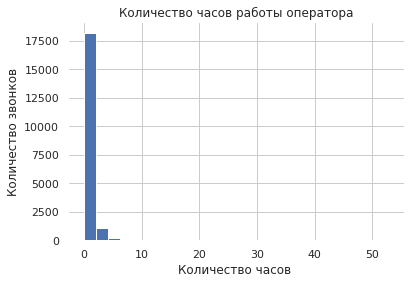

In [31]:
# Построение гистограммы
plt.hist(df_abnormal['total_call_duration'], bins=25)  # Замените 'operator_id' на нужный вам столбец

# Настройка осей и заголовка
plt.xlabel('Количество часов ')
plt.ylabel('Количество звонков')
plt.title('Количество часов работы оператора')

# Отображение графика
plt.show()


На гистрограмме видно что большинство операторов укладываются в рабочий день до 10 часов.

Также присутсвуют хвосты на 50 часовой рабочий день....

In [32]:
#Операторы которые работают больше 9 часов(4 часа работы + 1 час обед и снова 4 часа работы)
#У каждого работника должен быть уникальный id - оператора
df_abnormal = df_abnormal.query('total_call_duration > 9')
df_abnormal.sort_values('total_call_duration', ascending=False)

,user_id,date,operator_id,call_duration,total_call_duration,calls_count
2352,166582,2019-09-25,885876.0,40.28,52.77,2039
2354,166582,2019-09-26,885876.0,38.09,47.82,1603
2320,166582,2019-09-09,885876.0,34.03,44.67,1700
2338,166582,2019-09-18,885876.0,33.84,44.22,1638
2366,166582,2019-10-02,885876.0,33.92,43.17,1570
...,...,...,...,...,...,...
2275,166582,2019-08-17,885890.0,6.31,9.44,444
2440,166582,2019-10-29,885876.0,6.73,9.39,384
14909,167827,2019-11-25,929426.0,4.65,9.30,821
10905,167285,2019-10-10,908640.0,6.39,9.10,902


In [33]:
# Уникальные пользователи у которых аномальное количество звонков
df_abnormal['user_id'].unique()

array([166582, 167285, 167827, 168253, 168361])

In [34]:
abnormal_per = ((df_abnormal['user_id'].nunique() / df['user_id'].nunique()) * 100)
round(abnormal_per,2)

1.63

### Вывод

5 Уникальный пользователей или 1.63% у нас имеют аномальную активность у операторов

Сколько звонков должен делать оператор колл-центра?

До сих пор нет единого мнения о том, сколько исходящих звонков должен делать оператор колл-центра.  А это – один из важных 
показателей продуктивности, как каждого сотрудника, так и всего телемаркетингового отдела.

Среднее кол-во звонков в день которое должен совершать оператор = 144
(18 звонков в час.)

Предположу что под одним id работают несколько человек, один ушел другой занял его место.

Но тогда активность разговоров не может привышать в сутки 24 часа.

Каждый оператор должен иметь уникальный id - для подсчета заработный платы, если они на сдельной оплате.

Также для отслеживания качества работы. 

In [35]:
#Обновим датафрейм
df_new = df.query('user_id not in @df_abnormal.user_id').reset_index(drop=True)
df_new.sort_values(by='total_call_duration', ascending=False)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
45202,168252,2019-11-26,in,False,NaN,True,1590,0.000000,711.116667
45154,168252,2019-11-25,in,False,NaN,True,1679,0.000000,704.183333
45069,168252,2019-11-22,in,False,NaN,False,52,436.250000,439.116667
45255,168252,2019-11-28,in,False,NaN,False,45,396.083333,398.283333
45207,168252,2019-11-27,in,False,NaN,False,52,395.100000,398.233333
...,...,...,...,...,...,...,...,...,...
19262,167052,2019-10-28,in,False,NaN,True,2,0.000000,0.000000
19213,167052,2019-10-12,in,False,NaN,True,1,0.000000,0.000000
19203,167052,2019-10-10,in,False,NaN,True,2,0.000000,0.000000
19112,167052,2019-09-18,in,False,NaN,True,2,0.000000,0.000000


In [36]:
#Доля данных после фильтрации
round((len(df)/df_raw) * 100,2)

90.91

## Выводы


1. Произвели замену типов столбцов.

2. Были найдены 4900 дубликатов около 9%. Данные дуликаты были удалены.

3. После фильрации данных, у нас осталось 91% датасета df

4. Были выявленый операторы с ономальной длительность работы. Более 9 часов работы или до 52 часов разговоров за сутки. 

5. Создан датасет тарифов

6. В столбце df['operator_id']  очень много пропущенных звонков в основном это не взяли трубку. 113 абонентов которые разговривали тоже не назначился оператор.

Пунк 4 и 6 надо передать в технический отдел. Данные ошибки могут влиять на доходы.

# Изучим базу данных Client и проверим на пересекающихся пользователей

In [37]:
#Просмотрим базу client
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [38]:
display(client['date_start'].min(),
client['date_start'].max())

'2019-08-01'

'2019-10-31'

In [39]:
display(df['date'].min(),
df['date'].max())


Timestamp('2019-08-02 00:00:00')

Timestamp('2019-11-28 00:00:00')

In [40]:
#Снова выведем уникальный пользователей из базы df
df['user_id'].nunique()

307

In [41]:
# Допольнительно проверим
client['user_id'].nunique()

732

Пользователей в базе client 732, а в базе df 307

Можем сказать что  в базе df уже содержаться пользователи которые проявляют минимальную активность. 

Получается половину клиентов серсива 'НУПОЗВОНИ' уже перестало им пользоваться. 

In [42]:
#Подключим таблицу клиентов к df
df_t_plan = df.merge(client, on='user_id')

In [43]:
#Посмоттрим распределение тарифных планов в таблице df
df_t_plan.groupby('tariff_plan')['user_id'].nunique()

tariff_plan
A     34
B    112
C    161
Name: user_id, dtype: int64

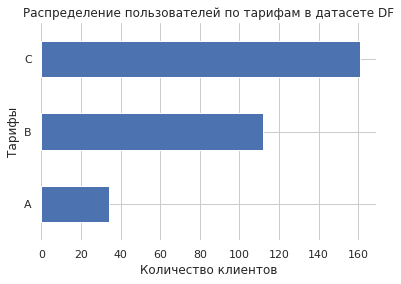

In [44]:
#График распределение пользователей на тариффам датасета DF
ax = df_t_plan.groupby('tariff_plan')['user_id'].nunique().plot(kind='barh')
ax.set_title('Распределение пользователей по тарифам в датасете DF')
ax.set_xlabel('Количество клиентов')
ax.set_ylabel('Тарифы')
plt.show()


In [45]:
#Посмоттрим распределение тарифных планов в таблице clietn
client['tariff_plan'].value_counts()

C    395
B    261
A     76
Name: tariff_plan, dtype: int64

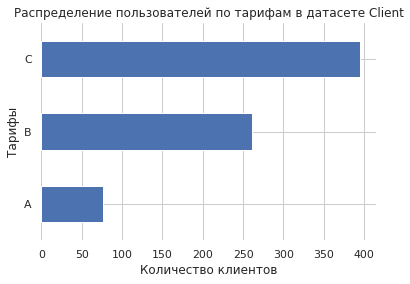

In [46]:
#График распределение пользователей на тариффам датасета DF
ax = client['tariff_plan'].value_counts().sort_values(ascending=True).plot(kind='barh')
ax.set_title('Распределение пользователей по тарифам в датасете Сlient')
ax.set_xlabel('Количество клиентов')
ax.set_ylabel('Тарифы')
plt.show()


Самый базовый тариф С у нас самый популярный 

In [47]:
#Фильтруем данные по клиентам и тарифм
users_tariff_c = set(client[client['tariff_plan'] == 'С']['user_id'].unique())
users_tariff_b = set(client[client['tariff_plan'] == 'B']['user_id'].unique())
users_tariff_a = set(client[client['tariff_plan'] == 'A']['user_id'].unique())

#Проверем пересечение
intersection_1_2_3 = users_tariff_c.intersection(users_tariff_b, users_tariff_a)

if len(intersection_1_2_3) > 0:
    print("Есть пересечение пользователей по трем тарифам.")
else:
    print("Нет пересечения пользователей по трем тарифам.")


Нет пересечения пользователей по трем тарифам.


## Вывод

В таблице client у нас пользователи зарегестрированные с '2019-08-01' по '2019-10-31' - их количество составило 732 уникальный пользователя.


В таблице df у нас пользователи зарегестрированные с '2019-08-02' по '2019-11-28' - их количество составило 307 уникальный.

Получается в компании было 732 уникальных пользователи. По факту нам в данных выгрузили на 307 уникальный. 

Из 307 пользователей нам надо найти активных. 

Предположу что компания уже потеряла 50% своих пользователей, или у нас не верно выгруженны датасет.

Пересечений среди пользоватеелей трех тарифов A, B и C нету.



# Найти клиентов

## Уникальные активные клиенты

In [48]:
#Минимальная и максимальная дата 
display(df['date'].min())
df['date'].max()

Timestamp('2019-08-02 00:00:00')

Timestamp('2019-11-28 00:00:00')

In [49]:
#Находим значение месяца
df.loc[:, 'month_of_usage'] = df.loc[:, 'date'].dt.month

In [50]:
#Берем исходие звонки не внутренние с времени больше нуля и активность за 11 месяц 
active_users = df[(df['direction'] == 'out') & (df['internal'] == False)]
active_users = active_users[(active_users['total_call_duration'] > 0) & (active_users['month_of_usage'] == 11)]
active = active_users['user_id'].unique()

In [51]:
#Фильтурем изначальный датасет на таких пользователей уже по всем вариантам звонков
df_active_users = df.query('user_id in @active ')
df_active_users['user_id'].nunique()

176

In [52]:
#Убираем пользователей из августа по условиям задачи
df_active = df_active_users.query('month_of_usage != 8')
#Проверили все типы звонков есть у нас 
df_active.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month_of_usage
118,166377,2019-09-02,in,False,880028.0,False,2,1.100000,1.250000,9
119,166377,2019-09-02,in,False,880026.0,False,1,0.516667,0.566667,9
120,166377,2019-09-02,out,False,880026.0,False,16,30.883333,33.050000,9
121,166377,2019-09-02,out,False,880026.0,True,6,0.000000,2.800000,9
122,166377,2019-09-02,out,False,880028.0,False,20,42.150000,44.783333,9


In [53]:
df_active.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration,month_of_usage
count,40895.000000,35621.000000,40895.000000,40895.000000,40895.000000,40895.000000
mean,167322.442279,918191.883833,15.149872,13.998143,18.510584,10.345201
std,609.990948,21444.682589,59.995612,63.933035,75.426754,0.728011
min,166377.000000,879896.000000,1.000000,0.000000,0.000000,9.000000
25%,166782.000000,901880.000000,1.000000,0.000000,0.850000,10.000000
50%,167176.000000,916618.000000,4.000000,0.833333,3.666667,10.000000
75%,167888.000000,937862.000000,12.000000,10.075000,14.683333,11.000000
max,168606.000000,973120.000000,4817.000000,2406.583333,2769.250000,11.000000


 ## Общие расходы клиентов

In [54]:
#Находим суммарное ежедневное количество минут, звонков и операторов
active_users_daily_usage = df_active.groupby(['user_id', 'date','month_of_usage', 'direction', 'internal'])\
    .agg({'operator_id':'nunique', 'calls_count':'sum', 'total_call_duration':'sum'})\
    .rename(columns={'operator_id':'num_of_operators', 'month_of_usage': 'month'})\
    .reset_index()

active_users_daily_usage

,user_id,date,month_of_usage,direction,internal,num_of_operators,calls_count,total_call_duration
0,166377,2019-09-02,9,in,False,2,3,1.816667
1,166377,2019-09-02,9,out,False,3,73,103.100000
2,166377,2019-09-02,9,out,True,1,2,0.000000
3,166377,2019-09-03,9,in,False,0,1,0.333333
4,166377,2019-09-03,9,out,False,2,66,76.583333
...,...,...,...,...,...,...,...,...
13522,168606,2019-11-09,11,out,False,1,4,9.883333
13523,168606,2019-11-10,11,out,True,1,2,1.050000
13524,168606,2019-11-11,11,out,True,1,2,8.350000
13525,168606,2019-11-15,11,out,True,1,4,53.166667


In [55]:
#Потребляемый объем услуг за месяц
active_users_month_usage = active_users_daily_usage.groupby(['user_id', 'month_of_usage', 'direction', 'internal'])\
    .agg({'num_of_operators':'nunique', 'calls_count':'sum', 'total_call_duration':'sum'})\
    .reset_index()
active_users_month_usage

,user_id,month_of_usage,direction,internal,num_of_operators,calls_count,total_call_duration
0,166377,9,in,False,3,46,32.816667
1,166377,9,out,False,2,1393,1763.916667
2,166377,9,out,True,2,13,0.150000
3,166377,10,in,False,3,52,45.666667
4,166377,10,out,False,3,1347,1653.450000
...,...,...,...,...,...,...,...
1123,168603,11,in,False,1,1,0.500000
1124,168603,11,out,False,1,14,19.783333
1125,168606,11,in,False,2,11,14.950000
1126,168606,11,out,False,1,8,16.016667


In [56]:
#Присоединяем значение тарифа
active_users_month_usage = active_users_month_usage.merge(client[['user_id', 'tariff_plan']], 
                                                          how='left', 
                                                          on='user_id')
#Создадим на будущее таблицу
tariff_plan_all = active_users_month_usage

active_users_month_usage

,user_id,month_of_usage,direction,internal,num_of_operators,calls_count,total_call_duration,tariff_plan
0,166377,9,in,False,3,46,32.816667,B
1,166377,9,out,False,2,1393,1763.916667,B
2,166377,9,out,True,2,13,0.150000,B
3,166377,10,in,False,3,52,45.666667,B
4,166377,10,out,False,3,1347,1653.450000,B
...,...,...,...,...,...,...,...,...
1123,168603,11,in,False,1,1,0.500000,B
1124,168603,11,out,False,1,14,19.783333,B
1125,168606,11,in,False,2,11,14.950000,C
1126,168606,11,out,False,1,8,16.016667,C


In [57]:
#Присоединяем таблицу цен по тарифам
active_users_month_usage = active_users_month_usage.merge(rate)
active_users_month_usage 

,user_id,month_of_usage,direction,internal,num_of_operators,calls_count,total_call_duration,tariff_plan,month_pay,incoming_call,minutes_tariff,over_limit_price,out_except_internal,operator_cost
0,166377,9,in,False,3,46,32.816667,B,2000,0,500,0.15,0.5,150
1,166377,9,out,False,2,1393,1763.916667,B,2000,0,500,0.15,0.5,150
2,166377,9,out,True,2,13,0.150000,B,2000,0,500,0.15,0.5,150
3,166377,10,in,False,3,52,45.666667,B,2000,0,500,0.15,0.5,150
4,166377,10,out,False,3,1347,1653.450000,B,2000,0,500,0.15,0.5,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,168601,11,out,False,2,586,553.200000,C,1000,0,0,0.30,0.7,300
1124,168601,11,out,True,1,1,0.000000,C,1000,0,0,0.30,0.7,300
1125,168606,11,in,False,2,11,14.950000,C,1000,0,0,0.30,0.7,300
1126,168606,11,out,False,1,8,16.016667,C,1000,0,0,0.30,0.7,300


In [58]:
#Количество операторов
active_users_month_usage['operator_paid'] = active_users_month_usage['operator_cost'] * \
                                             active_users_month_usage['num_of_operators']
active_users_month_usage

,user_id,month_of_usage,direction,internal,num_of_operators,calls_count,total_call_duration,tariff_plan,month_pay,incoming_call,minutes_tariff,over_limit_price,out_except_internal,operator_cost,operator_paid
0,166377,9,in,False,3,46,32.816667,B,2000,0,500,0.15,0.5,150,450
1,166377,9,out,False,2,1393,1763.916667,B,2000,0,500,0.15,0.5,150,300
2,166377,9,out,True,2,13,0.150000,B,2000,0,500,0.15,0.5,150,300
3,166377,10,in,False,3,52,45.666667,B,2000,0,500,0.15,0.5,150,450
4,166377,10,out,False,3,1347,1653.450000,B,2000,0,500,0.15,0.5,150,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,168601,11,out,False,2,586,553.200000,C,1000,0,0,0.30,0.7,300,600
1124,168601,11,out,True,1,1,0.000000,C,1000,0,0,0.30,0.7,300,300
1125,168606,11,in,False,2,11,14.950000,C,1000,0,0,0.30,0.7,300,600
1126,168606,11,out,False,1,8,16.016667,C,1000,0,0,0.30,0.7,300,300


In [59]:
#Звонки исходящие не внутренние
find_outgoing_non_internal = ((active_users_month_usage['internal']==False) & 
                              (active_users_month_usage['direction']=='out'))
active_users_month_usage.loc[find_outgoing_non_internal, 'minutes_paid'] = (
    active_users_month_usage['total_call_duration'] * active_users_month_usage['out_except_internal'])

In [60]:
#Посчитаем тарификацию сверх минут вколюченных 
find_internal_over_limit = ((active_users_month_usage['internal'] == True) &
                            (active_users_month_usage['total_call_duration'] > 2000) &
                            (active_users_month_usage['direction'] == 'out') &
                            (active_users_month_usage['tariff_plan'] == 'A'))
active_users_month_usage.loc[find_internal_over_limit, 'internal_paid'] = (
    ((active_users_month_usage['total_call_duration'] - 2000) * active_users_month_usage['over_limit_price']) 
)

In [61]:
#Посчитаем тарификацию сверх минут вколюченных в тариф
find_internal_over_limit = ((active_users_month_usage['internal'] == True) &
                            (active_users_month_usage['total_call_duration'] > 500) &
                            (active_users_month_usage['direction'] == 'out') &
                            (active_users_month_usage['tariff_plan'] == 'B'))
active_users_month_usage.loc[find_internal_over_limit, 'internal_paid'] = (
    (active_users_month_usage['total_call_duration']-500) * active_users_month_usage['over_limit_price']
)

In [62]:
#Посчитаем тарификацию сверх минут вколюченных в тариф
find_internal_over_limit = ((active_users_month_usage['internal'] == True) &
                            (active_users_month_usage['total_call_duration'] > 0) &
                            (active_users_month_usage['direction'] == 'out') &
                            (active_users_month_usage['tariff_plan'] == 'C'))
active_users_month_usage.loc[find_internal_over_limit, 'internal_paid'] = (
    active_users_month_usage['total_call_duration'] * active_users_month_usage['over_limit_price']
)

In [63]:
#Пропуспи заполним нулями
active_users_month_usage['minutes_paid'] = active_users_month_usage['minutes_paid'].fillna(0)
active_users_month_usage['internal_paid'] = active_users_month_usage['internal_paid'].fillna(0)

In [64]:
#Общая сумма за потраченные минуты
active_users_month_usage['paid_for_minutes_total'] = active_users_month_usage['minutes_paid'] + \
                                                      active_users_month_usage['internal_paid']
active_users_month_usage

,user_id,month_of_usage,direction,internal,num_of_operators,calls_count,total_call_duration,tariff_plan,month_pay,incoming_call,minutes_tariff,over_limit_price,out_except_internal,operator_cost,operator_paid,minutes_paid,internal_paid,paid_for_minutes_total
0,166377,9,in,False,3,46,32.816667,B,2000,0,500,0.15,0.5,150,450,0.000000,0.00,0.000000
1,166377,9,out,False,2,1393,1763.916667,B,2000,0,500,0.15,0.5,150,300,881.958333,0.00,881.958333
2,166377,9,out,True,2,13,0.150000,B,2000,0,500,0.15,0.5,150,300,0.000000,0.00,0.000000
3,166377,10,in,False,3,52,45.666667,B,2000,0,500,0.15,0.5,150,450,0.000000,0.00,0.000000
4,166377,10,out,False,3,1347,1653.450000,B,2000,0,500,0.15,0.5,150,450,826.725000,0.00,826.725000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,168601,11,out,False,2,586,553.200000,C,1000,0,0,0.30,0.7,300,600,387.240000,0.00,387.240000
1124,168601,11,out,True,1,1,0.000000,C,1000,0,0,0.30,0.7,300,300,0.000000,0.00,0.000000
1125,168606,11,in,False,2,11,14.950000,C,1000,0,0,0.30,0.7,300,600,0.000000,0.00,0.000000
1126,168606,11,out,False,1,8,16.016667,C,1000,0,0,0.30,0.7,300,300,11.211667,0.00,11.211667


In [65]:
#Группироувем по пользователям месяцу и оплаты за месяц на сумму оплаты общего количество минут и операторов
a = active_users_month_usage.groupby(['user_id','month_of_usage','month_pay'])\
    .agg({'paid_for_minutes_total' : 'sum', 'operator_paid' : 'sum', 'num_of_operators' : 'sum'}).reset_index()
a

,user_id,month_of_usage,month_pay,paid_for_minutes_total,operator_paid,num_of_operators
0,166377,9,2000,881.958333,1050,7
1,166377,10,2000,826.725000,1050,7
2,166377,11,2000,794.866667,1050,7
3,166405,9,2000,1006.191667,1350,9
4,166405,10,2000,3148.633333,2400,16
...,...,...,...,...,...,...
434,168500,10,2000,0.000000,150,1
435,168500,11,2000,0.100000,600,4
436,168601,11,1000,387.240000,1800,6
437,168603,11,2000,9.891667,300,2


In [66]:
#Сколько пользователь платит в месяц
a['total_pay_month'] =  a['paid_for_minutes_total'] + a['month_pay'] + a['operator_paid']
a = a.merge(rate) # присоеденили таблицу с тарифами
a

,user_id,month_of_usage,month_pay,paid_for_minutes_total,operator_paid,num_of_operators,total_pay_month,tariff_plan,incoming_call,minutes_tariff,over_limit_price,out_except_internal,operator_cost
0,166377,9,2000,881.958333,1050,7,3931.958333,B,0,500,0.15,0.5,150
1,166377,10,2000,826.725000,1050,7,3876.725000,B,0,500,0.15,0.5,150
2,166377,11,2000,794.866667,1050,7,3844.866667,B,0,500,0.15,0.5,150
3,166405,9,2000,1006.191667,1350,9,4356.191667,B,0,500,0.15,0.5,150
4,166405,10,2000,3148.633333,2400,16,7548.633333,B,0,500,0.15,0.5,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,168466,11,1000,583.356667,1500,5,3083.356667,C,0,0,0.30,0.7,300
435,168473,10,1000,0.000000,300,1,1300.000000,C,0,0,0.30,0.7,300
436,168473,11,1000,5.670000,900,3,1905.670000,C,0,0,0.30,0.7,300
437,168601,11,1000,387.240000,1800,6,3187.240000,C,0,0,0.30,0.7,300


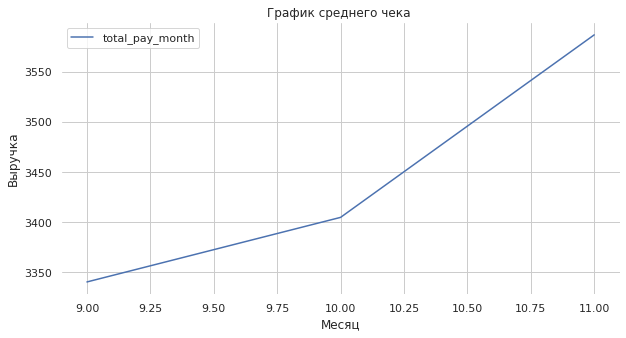

In [67]:
#Построим график динамики выручки в среднем по месяцам
ax = a.pivot_table(index='month_of_usage', values='total_pay_month', aggfunc='mean')\
.plot(kind='line', figsize=(10,5))
ax.set_title('График среднего чека ')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show()

Средний чек иметт рост между 9 и 10 месяцев и очень быстрый рост между 10 и 11 месяц.
Можно сказать начинается предновогодний период с октября

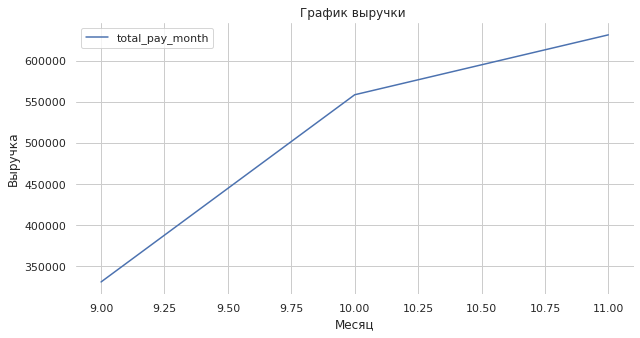

In [68]:
#Построим график динамики выручки
ax = a.pivot_table(index='month_of_usage', values='total_pay_month', aggfunc='sum')\
.plot(kind='line', figsize=(10,5))
ax.set_title('График выручки ')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show()

Выручка с сентябрь по октябрь растет очень быстро. 

Рост с октября но ноябрь меньше. 

Предположу, компании хотят закрыть хорошо год. и с сентября начинают готовится.

Мой личный опыт в торговли потверждает эту теории на протяжении 6 лет. 

Приготовил сани с сентября по октябрь. на новый год тебя ждут хорошие бонусы:) 

**Построим график по данныи посмотрим где у нас возникают аномалии или проблемы**

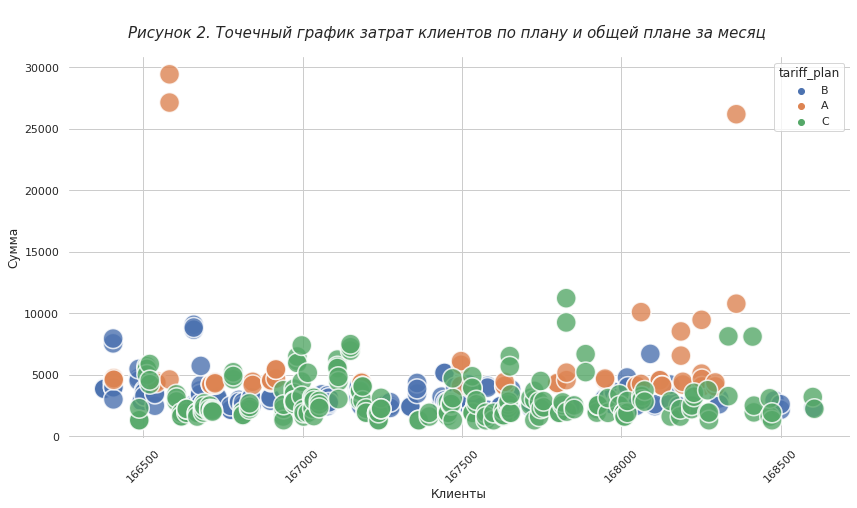

In [69]:
# строим график
fig, ax = plt.subplots(figsize=(14,7))
fig.suptitle('\nРисунок 2. Точечный график затрат клиентов по плану и общей плане за месяц',
             fontsize=15, 
             style="italic")

ax = sns.scatterplot(x="user_id",
                     y="total_pay_month", 
                     data=a,
                     hue='tariff_plan',
                     alpha=.8,
                     s=400)

plt.xticks(rotation=45)

ax.set_ylabel('Сумма')
ax.set_xlabel('Клиенты');

Большая часть клиентов  платят за связь порядка 5 тыся в месяц.

Небольшая часть клиентов укладывается в 10-15 тысяч за  месяц.

Всего несколько клиентов платят порядка 25-35 тысяч за месяца. Возможно это один пользователь тарифа А и три  месяца его оплаты.

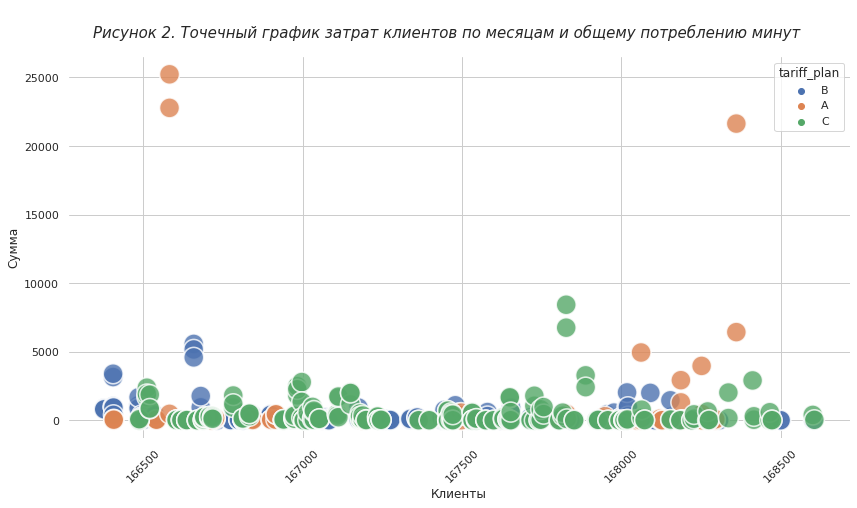

In [70]:
# строим график
fig, ax = plt.subplots(figsize=(14,7))
fig.suptitle('\nРисунок 2. Точечный график затрат клиентов по месяцам и общему потреблению минут',
             fontsize=15, 
             style="italic")

ax = sns.scatterplot(x="user_id",
                     y="paid_for_minutes_total", 
                     data=a,
                     hue='tariff_plan',
                     alpha=.8,
                     s=400)

plt.xticks(rotation=45)

ax.set_ylabel('Сумма')
ax.set_xlabel('Клиенты');

Картина оплаты за минуты в целом похоже на оплата тарификации за  месяц. 

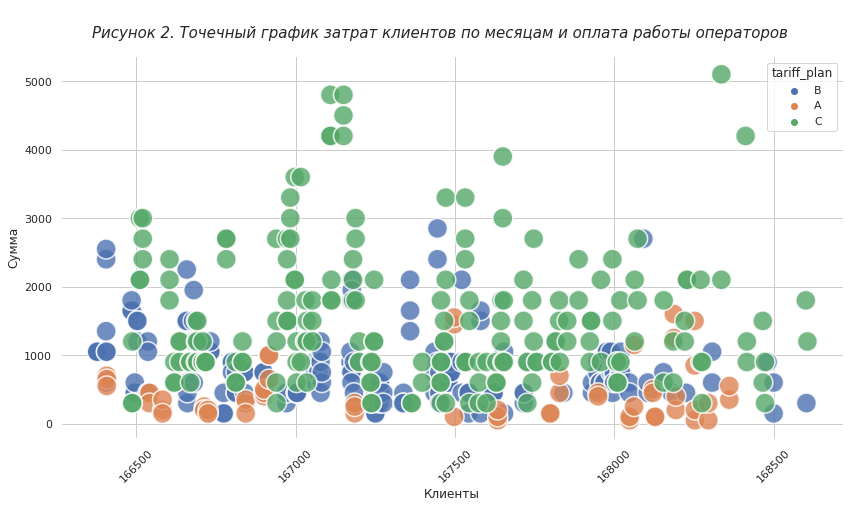

In [71]:
# строим график
fig, ax = plt.subplots(figsize=(14,7))
fig.suptitle('\nРисунок 2. Точечный график затрат клиентов по месяцам и оплата работы операторов',
             fontsize=15, 
             style="italic")

ax = sns.scatterplot(x="user_id",
                     y="operator_paid", 
                     data=a,
                     hue='tariff_plan',
                     alpha=.8,
                     s=400)

plt.xticks(rotation=45)

ax.set_ylabel('Сумма')
ax.set_xlabel('Клиенты');

Самое интересное намблюдает на этом графике.
Вопрос первый - при оформлении тарифов не указываются стоимость операторов? 
Вопрос второй - клиент не понял  сетки тарификации и подлючил  самый дешевый тариф('И так сойдет')

Пользователи тарифа С имеют самый большой разброс по оплате за операторов.

## Вывод

Уникальный клиентов в нашем датасете df - 307 пользователей
Активных пользователей составило 268( за период расчета 3 месяца. посмотрели кто пользовался связью в сентября и октябрь)


Обнаружен аномальный пользователей из тарифа A, который только за минуты заплатил 16 тысяч рублей.

Обнаружены пользоватили из тарифа B и C  которым очень дорого обходят операторы, потенциальные пользователи на смену тарифы.

## Каким пользователям можно предложить снижения тарифа

### Пользователи тарифов С

In [72]:
#Рассмотрим пользователей с тарифом б и платежам по операторам
b = a.query('tariff_plan == "C"').sort_values(by='total_pay_month',ascending=False)
b.head(10)

,user_id,month_of_usage,month_pay,paid_for_minutes_total,operator_paid,num_of_operators,total_pay_month,tariff_plan,incoming_call,minutes_tariff,over_limit_price,out_except_internal,operator_cost
391,167827,10,1000,8420.595000,1800,6,11220.595000,C,0,0,0.3,0.7,300
392,167827,11,1000,6748.420000,1500,5,9248.420000,C,0,0,0.3,0.7,300
429,168336,11,1000,2018.100000,5100,17,8118.100000,C,0,0,0.3,0.7,300
430,168412,11,1000,2902.000000,4200,14,8102.000000,C,0,0,0.3,0.7,300
316,167150,11,1000,1986.140000,4500,15,7486.140000,C,0,0,0.3,0.7,300
291,166997,9,1000,2783.230000,3600,12,7383.230000,C,0,0,0.3,0.7,300
315,167150,10,1000,2031.201667,4200,14,7231.201667,C,0,0,0.3,0.7,300
314,167150,9,1000,1155.650000,4800,16,6955.650000,C,0,0,0.3,0.7,300
396,167888,10,1000,3272.988333,2400,8,6672.988333,C,0,0,0.3,0.7,300
372,167650,10,1000,1617.268333,3900,13,6517.268333,C,0,0,0.3,0.7,300


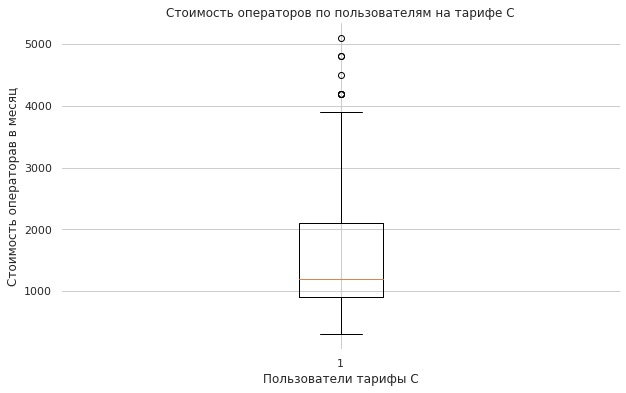

In [73]:
#Посмтроим боксплот и посмотрим выбросы
plt.figure(figsize=(10, 6))
plt.boxplot(b['operator_paid'])
plt.xlabel('Пользователи тарифы С')
plt.ylabel('Стоимость операторав в месяц')
plt.title('Cтоимость операторов по пользователям на тарифе С')
plt.show()

# Нахождение выбросов
q1 = b['operator_paid'].quantile(0.25)
q3 = b['operator_paid'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = b[(b['operator_paid'] < lower_bound) | (b['operator_paid'] > upper_bound)]


Выбросы начинаются после 20000 тысяч за оплату работы оператора  и есть пользовали с тарифы С которые платят 80000 тысяч за операторов.

In [74]:
#отсортируем пользоваталей кто платит за операторов больше 20 тысяч
user_counts_С = b.query('operator_paid > 4000')

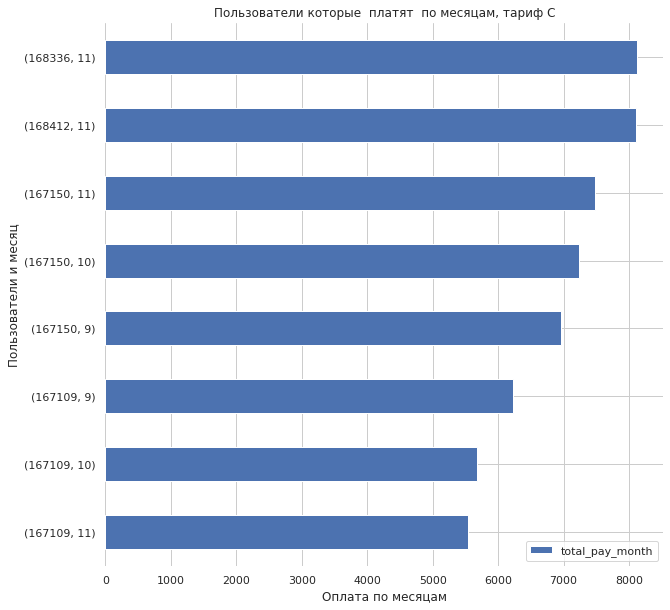

In [75]:
#Построим график по таким пользователям и доходу в месяц
tariff_C = user_counts_С.pivot_table(index=['user_id', 'month_of_usage'], values='total_pay_month')\
.sort_values(by='total_pay_month', ascending=True)
ax = tariff_C.plot(kind='barh', figsize=(10, 10))
ax.set_title('Пользователи которые  платят  по месяцам, тариф С')
ax.set_xlabel('Оплата по месяцам')
ax.set_ylabel('Пользователи и месяц')
plt.show()

#### Пользователи  С, которым надо предложить новый тариф A

In [76]:
#Таблица нужна для расчетов дальше 
tariff_plan_all

,user_id,month_of_usage,direction,internal,num_of_operators,calls_count,total_call_duration,tariff_plan
0,166377,9,in,False,3,46,32.816667,B
1,166377,9,out,False,2,1393,1763.916667,B
2,166377,9,out,True,2,13,0.150000,B
3,166377,10,in,False,3,52,45.666667,B
4,166377,10,out,False,3,1347,1653.450000,B
...,...,...,...,...,...,...,...,...
1123,168603,11,in,False,1,1,0.500000,B
1124,168603,11,out,False,1,14,19.783333,B
1125,168606,11,in,False,2,11,14.950000,C
1126,168606,11,out,False,1,8,16.016667,C


In [77]:
#Из таблицы выше сделали из пользователей С пользователей A
new_users_A = tariff_plan_all.query('tariff_plan == "C"')
new_users_A['tariff_plan'] = 'A'
new_users_A = new_users_A.merge(rate)

/tmp/ipykernel_146/1446149045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_users_A['tariff_plan'] = 'A'


In [78]:
#Не сильно силен в функция, но данная автоматизация мне поможет :)
#Создал переменную буду сюда вставлять созданные таблицы с пользователями чтобы посчитать все
n = new_users_A

#Количество операторов
n['operator_paid'] = n['operator_cost'] * \
                                             n['num_of_operators']


#Звонки исходящие не внутренние
find_outgoing_non_internal = ((n['internal']==False) & 
                              (n['direction']=='out'))
n.loc[find_outgoing_non_internal, 'minutes_paid'] = (
    n['total_call_duration'] * n['out_except_internal'])


#Посчитаем тарификацию сверх минут вколюченных 
find_internal_over_limit = ((n['internal'] == True) &
                            (n['total_call_duration'] > 2000) &
                            (n['direction'] == 'out') &
                            (n['tariff_plan'] == 'A'))
n.loc[find_internal_over_limit, 'internal_paid'] = (
    ((n['total_call_duration'] - 2000) * n['over_limit_price']) 
)


#Пропуспи заполним нулями
n['minutes_paid'] = n['minutes_paid'].fillna(0)
n['internal_paid'] = n['internal_paid'].fillna(0)


#Общая сумма за потраченные минуты
n['paid_for_minutes_total'] = n['minutes_paid'] + \
                                                      n['internal_paid']



#Группироувем по пользователям месяцу и оплаты за месяц на сумму оплаты общего количество минут и операторов
t = n.groupby(['user_id','month_of_usage','month_pay'])\
    .agg({'paid_for_minutes_total' : 'sum', 'operator_paid' : 'sum', 'num_of_operators' : 'sum'}).reset_index()



#Сколько пользователь платит в месяц
t['total_pay_month'] =  t['paid_for_minutes_total'] + t['month_pay'] + t['operator_paid']
old_user_C_new_A = t
old_user_C_new_A.head()

,user_id,month_of_usage,month_pay,paid_for_minutes_total,operator_paid,num_of_operators,total_pay_month
0,166487,9,4000,0.000,50,1,4050.000
1,166487,10,4000,0.000,50,1,4050.000
2,166487,11,4000,34.110,200,4,4234.110
3,166511,9,4000,722.085,500,10,5222.085
4,166511,10,4000,1015.740,350,7,5365.740


In [79]:
old_user_C_new_A = old_user_C_new_A.rename(columns={'total_pay_month' : 'total_pay_month_a'})
#Привязали таблицу где были пользователи с тарифа с и снова отсортировали по данным с боксплота
tarif_CA = old_user_C_new_A.merge(b, on=['user_id','month_of_usage'])
CA = tarif_CA.query('operator_paid_y > 4000')
CA = CA.rename(columns={'total_pay_month' : 'total_pay_month_c'})

Смена тарифа для пользователей с А на C в целом выгодно. Расходы пользователей сократятся от 50% до 10% в месяц. 

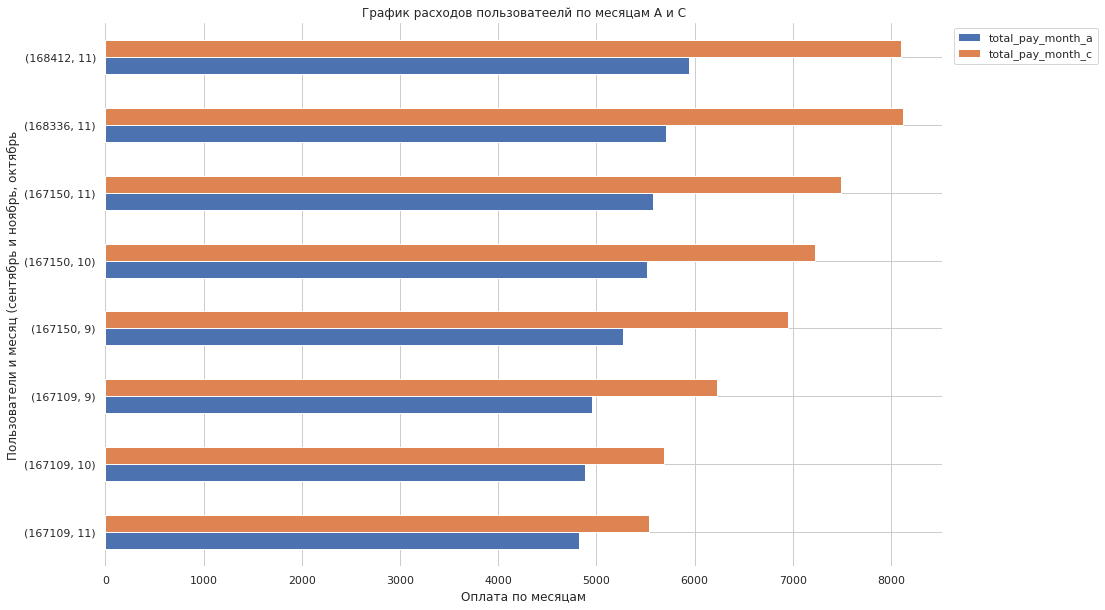

In [80]:
#Таблица новой тарификации пользователей по оплате операторов на тарифах С и A
ax = CA.pivot_table(index=['user_id', 'month_of_usage'], values=['total_pay_month_a','total_pay_month_c'])\
.sort_values(by='total_pay_month_a', ascending=True)\
.plot(kind='barh',figsize=(15, 10))
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
ax.set_title('График расходов пользоватеелй по месяцам A и С')
ax.set_xlabel('Оплата по месяцам')
ax.set_ylabel('Пользователи и месяц (сентябрь и ноябрь, октябрь')
plt.show()


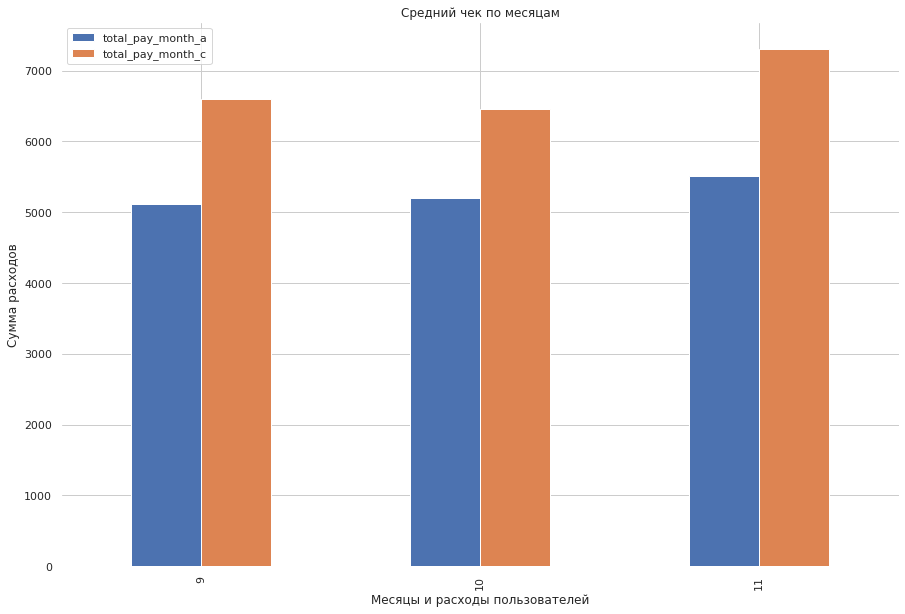

In [81]:
#Таблица новой тарификации пользователей по оплате операторов
ax = CA.pivot_table(index=['month_of_usage'], values=['total_pay_month_a','total_pay_month_c'], aggfunc='mean')\
.plot(kind='bar',figsize=(15, 10))
ax.set_title('Cредний чек по месяцам')
ax.set_xlabel('Месяцы и расходы пользователей')
ax.set_ylabel('Cумма расходов')
plt.show()


Смотрим срeдний доход по месяцам с пользователей. потери до 20 - 25% от месяца зависит

Меняем доход на лояльности? Да мы - робингуды :)

#### Вывод



Если активных пользователей тарифы С перевети на тариф A.

Потери в среднем чеке составят порядка 20-25%

Большинство пользователей получал пользу от смены тарифа

### Клиенты тарифов B

In [82]:
#Рассмотрим пользователей с тарифом б и платежам по операторам
tariff_b = a.query('tariff_plan == "B"').sort_values(by='total_pay_month',ascending=False)

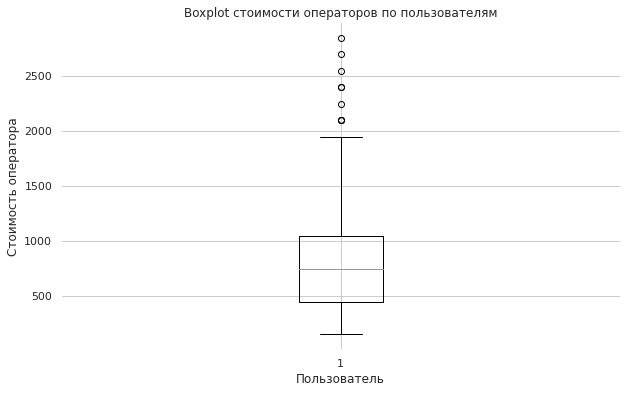

In [83]:
#Посмтроим боксплот и посмотрим выбросы
plt.figure(figsize=(10, 6))
plt.boxplot(tariff_b['operator_paid'])
plt.xlabel('Пользователь')
plt.ylabel('Стоимость оператора')
plt.title('Boxplot стоимости операторов по пользователям')
plt.show()

# Нахождение выбросов
q1 = b['operator_paid'].quantile(0.25)
q3 = b['operator_paid'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = b[(b['operator_paid'] < lower_bound) | (b['operator_paid'] > upper_bound)]

Выбросы по оплате операторов начинаются примерно в районе 13000 тысяч рублей за месяц

In [84]:
#отсортируем пользоваталей кто платит за операторов больше 20 тысяч
user_counts_b = tariff_b.query('operator_paid > 2000')

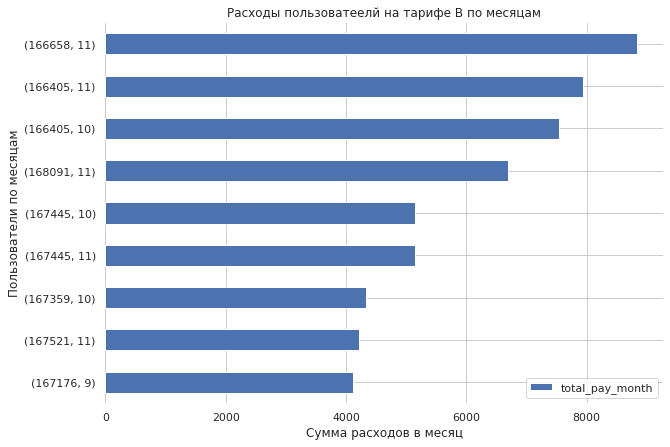

In [85]:
#Построим график по таким пользователям
tariff_b_old = user_counts_b.pivot_table(index=['user_id', 'month_of_usage'], values='total_pay_month')\
.sort_values(by='total_pay_month', ascending=True)
ax = tariff_b_old.plot(kind='barh', figsize=(10, 7))
ax.set_title('Расходы пользоватеелй на тарифе B по месяцам')
ax.set_ylabel('Пользователи по месяцам')
ax.set_xlabel('Cумма расходов в месяц')
plt.show()

#### Пользователи  B, которым надо предложить новый тариф A

In [86]:
#Из таблицы выше сделали из пользователей С пользователей A
new_users_BA = tariff_plan_all.query('tariff_plan == "B"')
new_users_BA['tariff_plan'] = 'A'
new_users_BA = new_users_BA.merge(rate, on='tariff_plan')

/tmp/ipykernel_146/3295053822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_users_BA['tariff_plan'] = 'A'


In [87]:
#Не сильно силен в функциях, но данная автоматизация мне поможет :)
#Создал переменную буду сюда вставлять созданные таблицы с пользователями чтобы посчитать все
n = new_users_BA

#Количество операторов
n['operator_paid'] = n['operator_cost'] * \
                                             n['num_of_operators']


#Звонки исходящие не внутренние
find_outgoing_non_internal = ((n['internal']==False) & 
                              (n['direction']=='out'))
n.loc[find_outgoing_non_internal, 'minutes_paid'] = (
    n['total_call_duration'] * n['out_except_internal'])


#Посчитаем тарификацию сверх минут вколюченных 
find_internal_over_limit = ((n['internal'] == True) &
                            (n['total_call_duration'] > 2000) &
                            (n['direction'] == 'out') &
                            (n['tariff_plan'] == 'A'))
n.loc[find_internal_over_limit, 'internal_paid'] = (
    ((n['total_call_duration'] - 2000) * n['over_limit_price']) 
)


#Пропуспи заполним нулями
n['minutes_paid'] = n['minutes_paid'].fillna(0)
n['internal_paid'] = n['internal_paid'].fillna(0)


#Общая сумма за потраченные минуты
n['paid_for_minutes_total'] = n['minutes_paid'] + \
                                                      n['internal_paid']



#Группироувем по пользователям месяцу и оплаты за месяц на сумму оплаты общего количество минут и операторов
t = n.groupby(['user_id','month_of_usage','month_pay'])\
    .agg({'paid_for_minutes_total' : 'sum', 'operator_paid' : 'sum', 'num_of_operators' : 'sum'}).reset_index()



#Сколько пользователь платит в месяц
t['total_pay_month'] =  t['paid_for_minutes_total'] + t['month_pay'] + t['operator_paid']
old_user_B_new_A = t
old_user_B_new_A.head()

,user_id,month_of_usage,month_pay,paid_for_minutes_total,operator_paid,num_of_operators,total_pay_month
0,166377,9,4000,529.175,350,7,4879.175
1,166377,10,4000,496.035,350,7,4846.035
2,166377,11,4000,476.920,350,7,4826.920
3,166405,9,4000,603.715,450,9,5053.715
4,166405,10,4000,1889.180,800,16,6689.180


In [88]:
old_user_B_new_A = old_user_B_new_A.rename(columns={'total_pay_month' : 'total_pay_month_a'})
#Привязали таблицу где были пользователи с тарифа с и снова отсортировали по данным с боксплота
tarif_BA = old_user_B_new_A.merge(tariff_b, on=['user_id','month_of_usage'])
BA = tarif_BA.query('operator_paid_y > 2000')
BA = BA.rename(columns={'total_pay_month' : 'total_pay_month_b'})

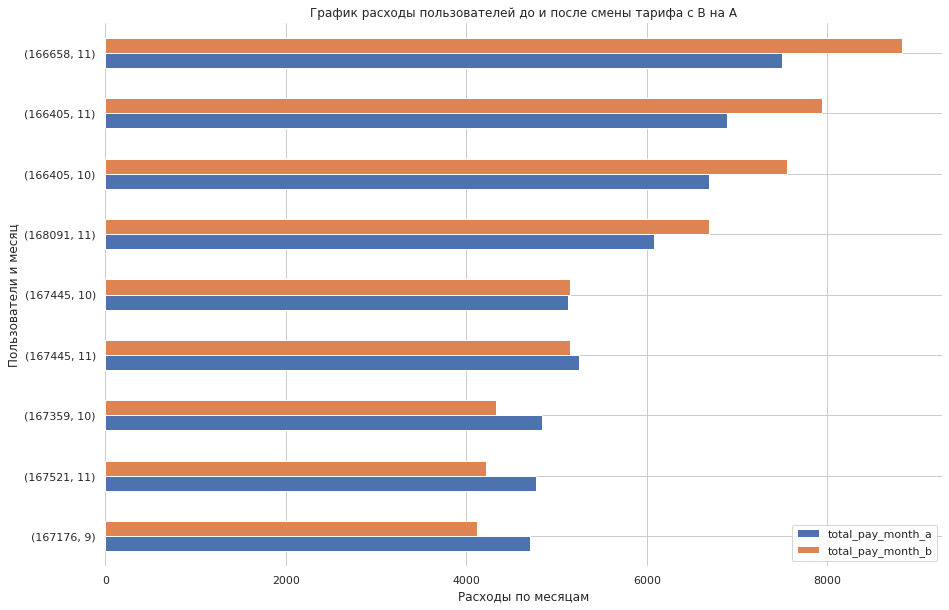

In [89]:
#Таблица новой тарификации пользователей по оплате операторов на тарифах С и A
ax = BA.pivot_table(index=['user_id', 'month_of_usage'], values=['total_pay_month_a','total_pay_month_b'])\
.sort_values(by='total_pay_month_b', ascending=True)\
.plot(kind='barh',figsize=(15, 10))
ax.set_title('График расходы пользователей до и после смены тарифа с B на А')
ax.set_xlabel('Расходы по месяцам')
ax.set_ylabel('Пользователи и месяц')
plt.show()


Смена тарифа пользователям с B на А не имеет большого смысла.

Так смена затрагивает точечную экономи по одному месяцу.

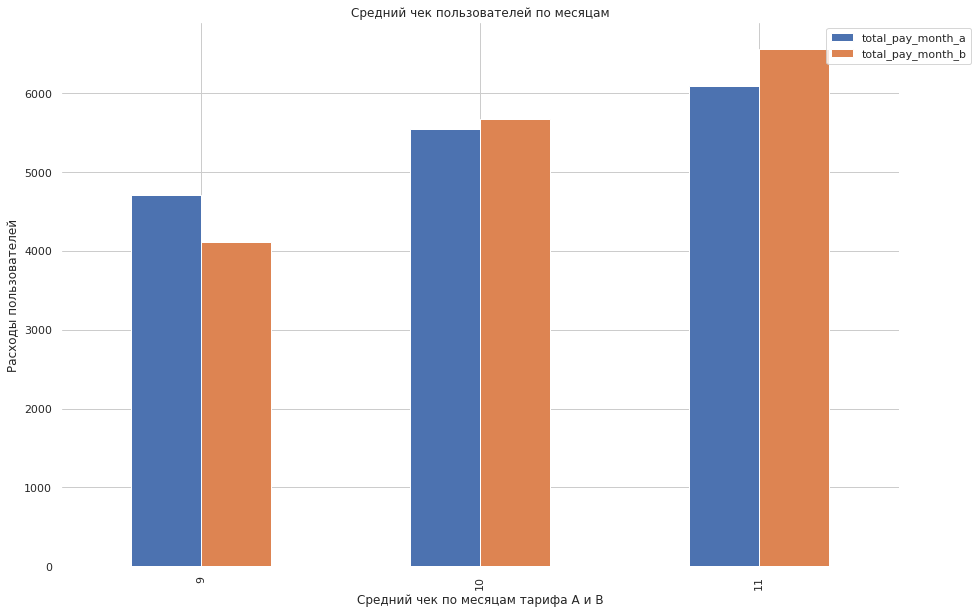

In [90]:
#Таблица новой тарификации пользователей по оплате операторов
ax = BA.pivot_table(index=['month_of_usage'], values=['total_pay_month_a','total_pay_month_b'], aggfunc='mean')\
.plot(kind='bar',figsize=(15, 10))
ax.legend(loc='upper center', bbox_to_anchor=(1, 1))
ax.set_title('Средний чек пользователей по месяцам')
ax.set_xlabel('Cредний чек по месяцам тарифа А и B')
ax.set_ylabel('Расходы пользователей')
plt.show()


Средний чек иметт большую разницу только за 9 месяц.

После смены тарифа 10 и 11 месяц по среднему чека не отличается, пользовались бы данные пользователями тарифом B или A

### Клиенты тарифов A

In [91]:
#Рассмотрим пользователей с тарифом A и платежам по операторам
tariff_a = a.query('tariff_plan == "A"').sort_values(by='total_pay_month',ascending=False).reset_index()
tariff_a.head(10)

,index,user_id,month_of_usage,month_pay,paid_for_minutes_total,operator_paid,num_of_operators,total_pay_month,tariff_plan,incoming_call,minutes_tariff,over_limit_price,out_except_internal,operator_cost
0,182,166582,9,4000,25222.445,200,4,29422.445,A,0,2000,0.1,0.3,50
1,183,166582,10,4000,22775.140,350,7,27125.140,A,0,2000,0.1,0.3,50
2,234,168361,11,4000,21628.175,550,11,26178.175,A,0,2000,0.1,0.3,50
3,233,168361,10,4000,6424.560,350,7,10774.560,A,0,2000,0.1,0.3,50
4,218,168062,11,4000,4938.410,1150,23,10088.410,A,0,2000,0.1,0.3,50
5,228,168252,11,4000,3962.035,1500,30,9462.035,A,0,2000,0.1,0.3,50
6,224,168187,11,4000,2920.285,1600,32,8520.285,A,0,2000,0.1,0.3,50
7,223,168187,10,4000,1300.755,1250,25,6550.755,A,0,2000,0.1,0.3,50
8,205,167497,11,4000,555.705,1550,31,6105.705,A,0,2000,0.1,0.3,50
9,204,167497,10,4000,358.435,1450,29,5808.435,A,0,2000,0.1,0.3,50


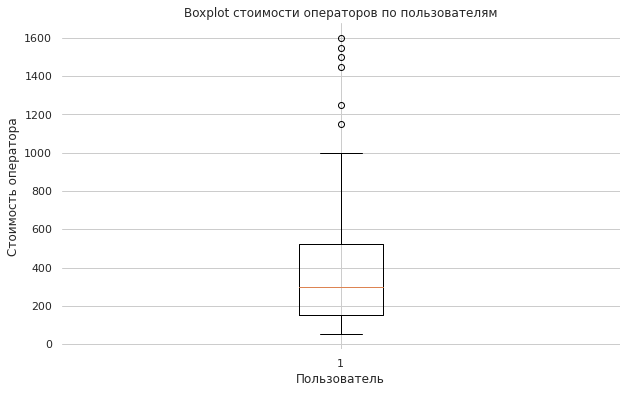

In [92]:
#Посмтроим боксплот и посмотрим выбросы
plt.figure(figsize=(10, 6))
plt.boxplot(tariff_a['operator_paid'])
plt.xlabel('Пользователь')
plt.ylabel('Стоимость оператора')
plt.title('Boxplot стоимости операторов по пользователям')
plt.show()

# Нахождение выбросов
q1 = b['operator_paid'].quantile(0.25)
q3 = b['operator_paid'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = b[(b['operator_paid'] < lower_bound) | (b['operator_paid'] > upper_bound)]

### Пользователи тарифа A которым можно предложить сменить тариф на B

In [93]:
#Срез по пользователям которые платять за операторов меньше 1000
tariff_old = tariff_a.query('operator_paid == 100')
tariff_old

,index,user_id,month_of_usage,month_pay,paid_for_minutes_total,operator_paid,num_of_operators,total_pay_month,tariff_plan,incoming_call,minutes_tariff,over_limit_price,out_except_internal,operator_cost
50,221,168128,10,4000,18.510,100,2,4118.510,A,0,2000,0.1,0.3,50
51,216,168048,11,4000,1.045,100,2,4101.045,A,0,2000,0.1,0.3,50
52,207,167634,10,4000,0.330,100,2,4100.330,A,0,2000,0.1,0.3,50
53,222,168128,11,4000,0.040,100,2,4100.040,A,0,2000,0.1,0.3,50
54,203,167497,9,4000,0.000,100,2,4100.000,A,0,2000,0.1,0.3,50


In [94]:
#Из таблицы выше сделали из пользователей С пользователей A
new_users_AB = tariff_plan_all.query('tariff_plan == "A"')
new_users_AB['tariff_plan'] = 'A'
new_users_AB = new_users_AB.merge(rate, on='tariff_plan')

/tmp/ipykernel_146/63225234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_users_AB['tariff_plan'] = 'B'


In [95]:
#Не сильно силен в функциях, но данная автоматизация мне поможет :)
#Создал переменную буду сюда вставлять созданные таблицы с пользователями чтобы посчитать все
n = new_users_AB

#Количество операторов
n['operator_paid'] = n['operator_cost'] * \
                                             n['num_of_operators']


#Звонки исходящие не внутренние
find_outgoing_non_internal = ((n['internal']==False) & 
                              (n['direction']=='out'))
n.loc[find_outgoing_non_internal, 'minutes_paid'] = (
    n['total_call_duration'] * n['out_except_internal'])


#Посчитаем тарификацию сверх минут вколюченных 
find_internal_over_limit = ((n['internal'] == True) &
                            (n['total_call_duration'] > 500) &
                            (n['direction'] == 'out') &
                            (n['tariff_plan'] == 'B'))
n.loc[find_internal_over_limit, 'internal_paid'] = (
    ((n['total_call_duration'] - 500) * n['over_limit_price']) 
)


#Пропуспи заполним нулями
n['minutes_paid'] = n['minutes_paid'].fillna(0)
n['internal_paid'] = n['internal_paid'].fillna(0)


#Общая сумма за потраченные минуты
n['paid_for_minutes_total'] = n['minutes_paid'] + \
                                                      n['internal_paid']



#Группироувем по пользователям месяцу и оплаты за месяц на сумму оплаты общего количество минут и операторов
t = n.groupby(['user_id','month_of_usage','month_pay'])\
    .agg({'paid_for_minutes_total' : 'sum', 'operator_paid' : 'sum', 'num_of_operators' : 'sum'}).reset_index()



#Сколько пользователь платит в месяц
t['total_pay_month'] =  t['paid_for_minutes_total'] + t['month_pay'] + t['operator_paid']
old_user_A_new_B = t
old_user_A_new_B.head()

,user_id,month_of_usage,month_pay,paid_for_minutes_total,operator_paid,num_of_operators,total_pay_month
0,166377,9,2000,881.958333,1050,7,3931.958333
1,166377,10,2000,826.725000,1050,7,3876.725000
2,166377,11,2000,794.866667,1050,7,3844.866667
3,166405,9,2000,1006.191667,1350,9,4356.191667
4,166405,10,2000,3148.633333,2400,16,7548.633333


In [96]:
old_user_A_new_B = old_user_A_new_B.rename(columns={'total_pay_month' : 'total_pay_month_b'})
#Привязали таблицу где были пользователи с тарифа с и снова отсортировали по данным с боксплота
tarif_AB = old_user_A_new_B.merge(tariff_b, on=['user_id','month_of_usage'])
AB = tarif_AB.query('operator_paid_y > 2000')
AB = AB.rename(columns={'total_pay_month' : 'total_pay_month_a'})

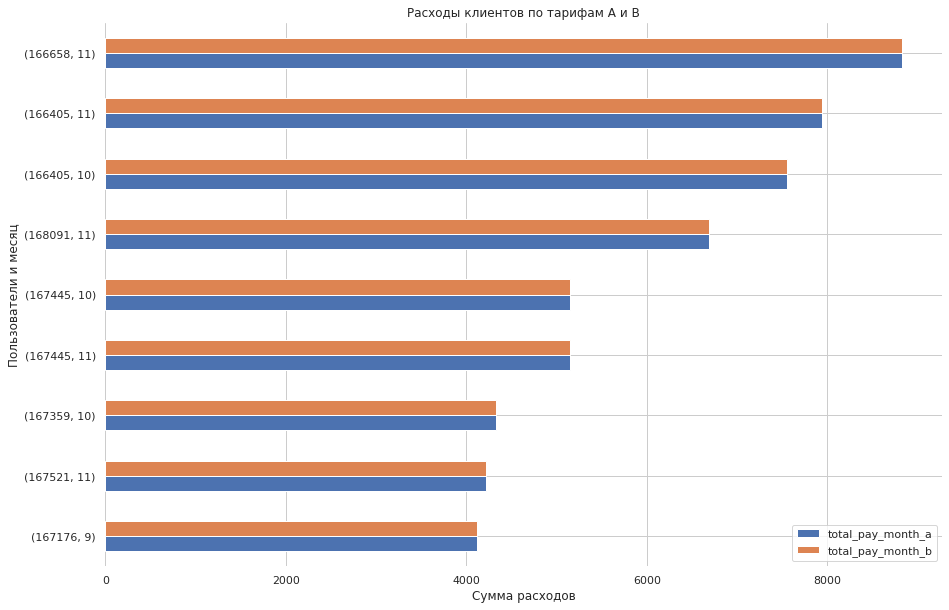

In [97]:
#Таблица новой тарификации пользователей по оплате операторов на тарифах С и A
ax = AB.pivot_table(index=['user_id', 'month_of_usage'], values=['total_pay_month_b','total_pay_month_a'])\
.sort_values(by='total_pay_month_a', ascending=True)\
.plot(kind='barh',figsize=(15, 10))
ax.set_title('Расходы клиентов по тарифам A и B')
ax.set_xlabel('Сумма расходов')
ax.set_ylabel('Пользователи и месяц')
plt.show()


Смена тарифа для пользователей с А на B не имеет смысла . 

Расходы одинаковые на всех месяцах

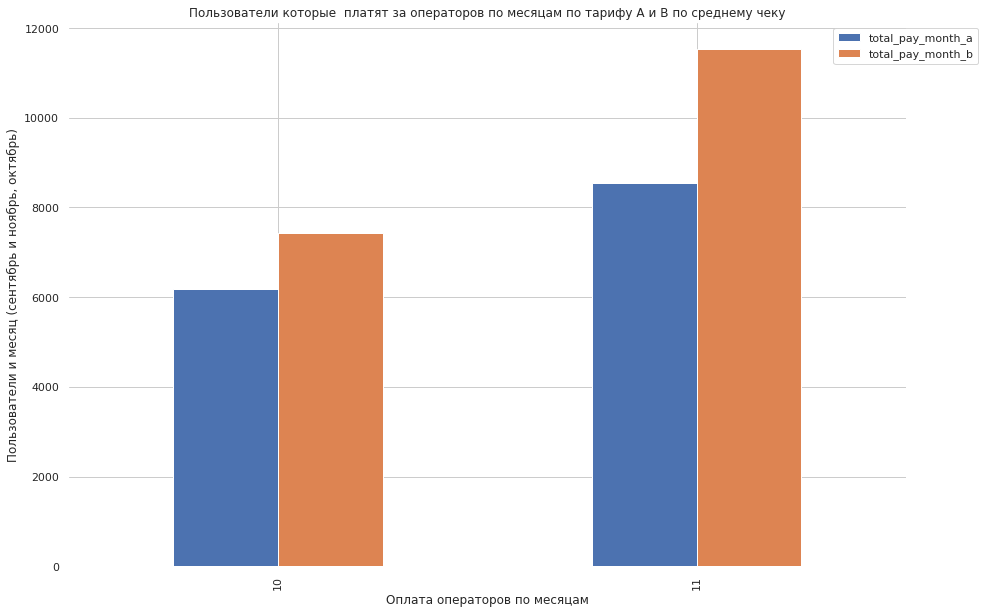

In [99]:
#Таблица новой тарификации пользователей по оплате операторов
ax = AB.pivot_table(index=['month_of_usage'], values=['total_pay_month_b','total_pay_month_a'], aggfunc='mean')\
.plot(kind='bar',figsize=(15, 10))
ax.legend(loc='upper center', bbox_to_anchor=(1, 1))
ax.set_title('Пользователи которые  платят за операторов по месяцам по тарифу А и B по среднему чеку')
ax.set_xlabel('Оплата операторов по месяцам')
ax.set_ylabel('Пользователи и месяц (сентябрь и ноябрь, октябрь)')
plt.show()


#### Вывод

Смена тарифа не имеет смысла. расходы не изменяться

## Создадим тариф D и посчитаем всех пользователей до этого.

In [100]:
#Создали усредненый тариф между A и B
rate_D = {
    'tariff_plan': ['D'],
    'month_pay': [2500],
    'incoming_call' : [0],
    'minutes_tariff' : [1000],
    'over_limit_price' : [0.2],
    'out_except_internal' : [0.25],
    'operator_cost' : [100]
}

rate_D = pd.DataFrame(rate_D)
rate_D

,tariff_plan,month_pay,incoming_call,minutes_tariff,over_limit_price,out_except_internal,operator_cost
0,D,2500,0,1000,0.2,0.25,100


In [101]:
#Обьеденим таблицу
tariff_d = pd.concat([user_counts_С, user_counts_b, tariff_old])
tariff_d.head()

,user_id,month_of_usage,month_pay,paid_for_minutes_total,operator_paid,num_of_operators,total_pay_month,tariff_plan,incoming_call,minutes_tariff,over_limit_price,out_except_internal,operator_cost,index
429,168336,11,1000,2018.100000,5100,17,8118.100000,C,0,0,0.3,0.7,300,NaN
430,168412,11,1000,2902.000000,4200,14,8102.000000,C,0,0,0.3,0.7,300,NaN
316,167150,11,1000,1986.140000,4500,15,7486.140000,C,0,0,0.3,0.7,300,NaN
315,167150,10,1000,2031.201667,4200,14,7231.201667,C,0,0,0.3,0.7,300,NaN
314,167150,9,1000,1155.650000,4800,16,6955.650000,C,0,0,0.3,0.7,300,NaN


In [102]:
#Из таблицы выше сделали из пользователей ABC пользователей D
new_users_ABC = tariff_plan_all
new_users_ABC['tariff_plan'] = 'D'
new_users_ABC = new_users_ABC.merge(rate_D, on='tariff_plan')

In [103]:
#Не сильно силен в функциях, но данная автоматизация мне поможет :)
#Создал переменную буду сюда вставлять созданные таблицы с пользователями чтобы посчитать все
n = new_users_ABC

#Количество операторов
n['operator_paid'] = n['operator_cost'] * \
                                             n['num_of_operators']


#Звонки исходящие не внутренние
find_outgoing_non_internal = ((n['internal']==False) & 
                              (n['direction']=='out'))
n.loc[find_outgoing_non_internal, 'minutes_paid'] = (
    n['total_call_duration'] * n['out_except_internal'])


#Посчитаем тарификацию сверх минут вколюченных 
find_internal_over_limit = ((n['internal'] == True) &
                            (n['total_call_duration'] > 1000) &
                            (n['direction'] == 'out') &
                            (n['tariff_plan'] == 'D'))
n.loc[find_internal_over_limit, 'internal_paid'] = (
    ((n['total_call_duration'] - 1000) * n['over_limit_price']) 
)


#Пропуспи заполним нулями
n['minutes_paid'] = n['minutes_paid'].fillna(0)
n['internal_paid'] = n['internal_paid'].fillna(0)


#Общая сумма за потраченные минуты
n['paid_for_minutes_total'] = n['minutes_paid'] + \
                                                      n['internal_paid']



#Группироувем по пользователям месяцу и оплаты за месяц на сумму оплаты общего количество минут и операторов
t = n.groupby(['user_id','month_of_usage','month_pay'])\
    .agg({'paid_for_minutes_total' : 'sum', 'operator_paid' : 'sum', 'num_of_operators' : 'sum'}).reset_index()



#Сколько пользователь платит в месяц
t['total_pay_month'] =  t['paid_for_minutes_total'] + t['month_pay'] + t['operator_paid']
old_user_AВC_new_D = t
old_user_AВC_new_D.head()

,user_id,month_of_usage,month_pay,paid_for_minutes_total,operator_paid,num_of_operators,total_pay_month
0,166377,9,2500,440.979167,700,7,3640.979167
1,166377,10,2500,413.362500,700,7,3613.362500
2,166377,11,2500,397.433333,700,7,3597.433333
3,166405,9,2500,503.095833,900,9,3903.095833
4,166405,10,2500,1574.316667,1600,16,5674.316667


In [104]:
#таблицу с наименование тарифа привязали
old_user_AВC_new_D = old_user_AВC_new_D.merge(client)

In [105]:
old_user_AВC_new_D = old_user_AВC_new_D.rename(columns={'total_pay_month' : 'total_pay_month_d'})
tariff_d = tariff_d.rename(columns={'total_pay_month' : 'total_pay_month_abc'})
#Привязали таблицу где были пользователи с тарифа с и снова отсортировали по данным с боксплота
tarif_ABC = old_user_AВC_new_D.merge(tariff_d, on=['user_id','month_of_usage'])

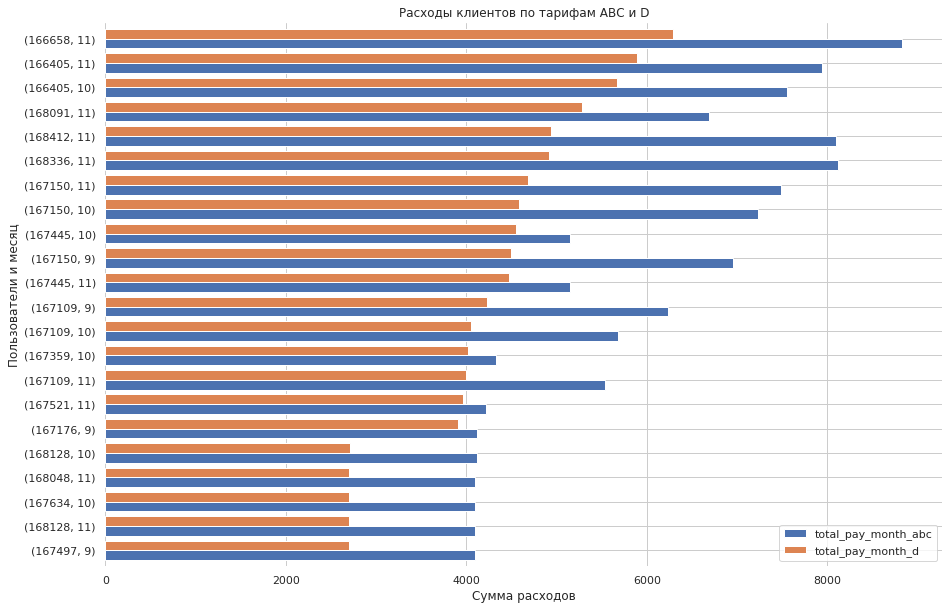

In [106]:
#Таблица новой тарификации пользователей по оплате операторов на тарифах С и A
ax = tarif_ABC.pivot_table(index=['user_id', 'month_of_usage'], values=['total_pay_month_d','total_pay_month_abc'])\
.sort_values(by='total_pay_month_d', ascending=True)\
.plot(kind='barh',figsize=(15, 10), width=0.8)
ax.set_title('Расходы клиентов по тарифам ABС и D')
ax.set_xlabel('Сумма расходов')
ax.set_ylabel('Пользователи и месяц')
plt.show()


Только одному пользователю 1667497 тариф D не приносит никакой пользы.

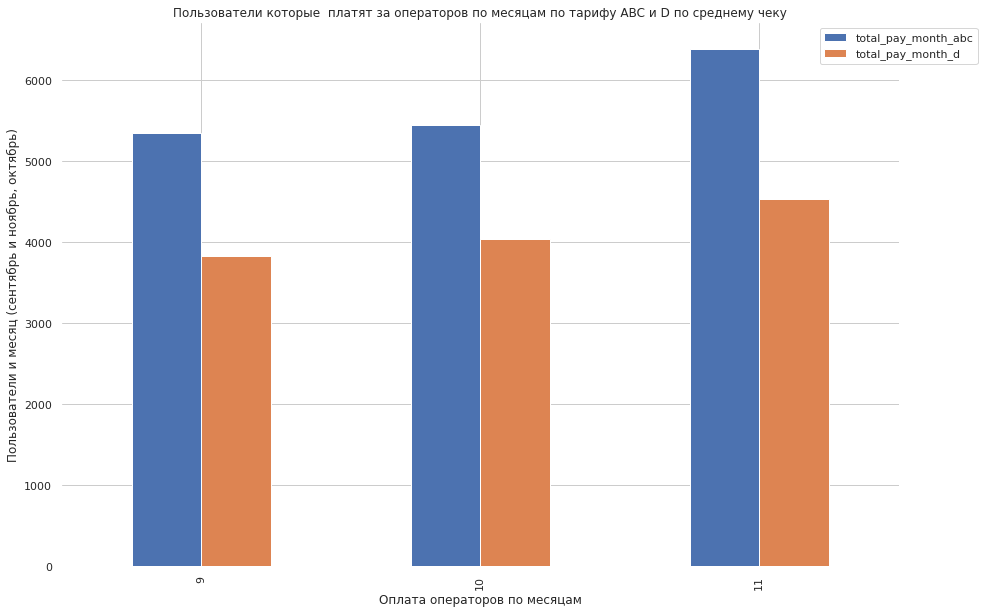

In [107]:
#Таблица новой тарификации пользователей по оплате операторов
ax = tarif_ABC.pivot_table(index=['month_of_usage'], values=['total_pay_month_d','total_pay_month_abc'], aggfunc='mean')\
.plot(kind='bar',figsize=(15, 10))
ax.legend(loc='upper center', bbox_to_anchor=(1, 1))
ax.set_title('Пользователи которые  платят за операторов по месяцам по тарифу АBC и D по среднему чеку')
ax.set_xlabel('Оплата операторов по месяцам')
ax.set_ylabel('Пользователи и месяц (сентябрь и ноябрь, октябрь)')
plt.show()


Если пользователей перевести с тарифов АBC на тариф D. 
В целом все получают какой-то профит.

Средний чек сокращается на 35-40% по месяцам.

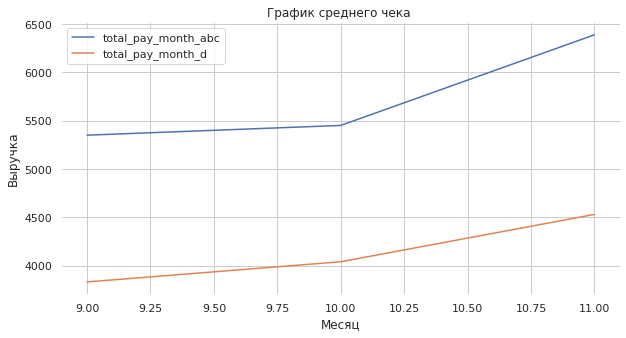

In [108]:
#Построим график динамики выручки в среднем по месяцам по пользователям со старых тарифов и новых
ax = tarif_ABC.pivot_table(index='month_of_usage', values=['total_pay_month_d','total_pay_month_abc'], aggfunc='mean')\
.plot(kind='line', figsize=(10,5))
ax.set_title('График среднего чека ')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
plt.show()

### Oбщий вывод

После изучение тарифной сетки. Можно сказать, что пользовали тарифо B в целом самые выгодные.

Если пользователь выбрал тариф A и перестал потреблять услуги. Можно сказать что данные пользовали покинули компанию.

Создали тариф D. Данный тариф показал, что он в целом универсальный и сокращает расходы пользователей.

Потери среднего чека составили около 35-40%.


# Проверка гипотез

In [109]:
total_pay =tarif_ABC\
.pivot_table(index=['user_id','month_of_usage'], values=['total_pay_month_d','total_pay_month_abc'])\
.reset_index()

In [110]:
#Смена тарифа
total_pay['total_pay_month_d']
#До смены тарифа
total_pay['total_pay_month_abc'].head()

0    7548.633333
1    7940.216667
2    8833.141667
3    6230.900000
4    5685.330000
Name: total_pay_month_abc, dtype: float64

    H0 средние затраты клиентов не изменится 
    
    H1 средние затраты клиентов изменяться

In [111]:
alpha = 0.05  # критический уровень статистической значимости

before = total_pay['total_pay_month_abc']
after = total_pay['total_pay_month_d']
# Проведение связанного t-теста
statistic, p_value = stats.ttest_rel(before, after)

print('p-значение: {0:.3f}'.format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print()
print('Средний чек до изменений тарифов: {:.2f}'.format(before.mean()))
print('Средний чек после изменений тарифов: {:.2f}'.format(after.mean()))
print()
print('Отличие среднего чека после изменений тарифов от среднего чека до изменений тарифов: {:.0%}'\
      .format(((after.mean() - before.mean()) / before.mean()) * 100))

p-значение: 0.000
Отвергаем нулевую гипотезу

Средний чек до изменений тарифов: 5902.10
Средний чек после изменений тарифов: 4248.38

Отличие среднего чека после изменений тарифов от среднего чека до изменений тарифов: -2802%


## Существует связь между длительностью пользования услугами компании и эффективностью использования тарифного плана.

In [112]:
#расчитаем рентабельность тарифа будет испьзовать это в тест как эффективность
total_pay['efficiency'] = (total_pay['total_pay_month_abc'] - total_pay['total_pay_month_d'])\
                                                                          /total_pay['total_pay_month_d']

Гипотеза: Существует связь между длительностью пользования услугами компании и эффективностью использования тарифного плана.
     
     H0 связи между длительностью пользования услугами компании и эффективностью использования тарифного плана нет
     
     H1 существует связь между длительностью пользования услугами компании и эффективностью использования тарифного плана. 

In [113]:
# Вычисление коэффициента корреляции и p-значения
correlation, p_value = pearsonr(total_pay['month_of_usage'], total_pay['efficiency'])

# Вывод результатов
print(f"Коэффициент корреляции: {correlation}")
print(f"p-значение: {p_value}")

# Проверка гипотезы
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
    print("Существует связь между длительностью пользования услугами\
    и эффективностью использования тарифного плана")
else:
    print("Не отвергаем нулевую гипотезу")
    print("Нет достаточных доказательств о наличии связи между длительностью пользования\
    услугами и эффективностью использования тарифного плана")


Коэффициент корреляции: 0.05860078363094519
p-значение: 0.7956043135531371
Не отвергаем нулевую гипотезу
Нет достаточных доказательств о наличии связи между длительностью пользования    услугами и эффективностью использования тарифного плана


Интересно было бы проверить это на датасете за пол года или год :)

# Общие выводы

Изучили датасет df - было обнаружено 307 уникальный клиентов за 4 не полных месяца c август по конец ноября.

Изучили датасет clietns - было обаружно 732 уникальных пользователя.  c август по конец октябрь.

Из датасета df было выялено 268 уникально активных клиентов за 3 месяца по условиям анализа.

У компании довольно большие потери по уникальным клиентам.

Также существуют операторы которые разговаривают больше 8 часов в сутки.
Возможно несколько людей работают под одним id.

Было найдено что существует много пропущенных звонков, которым не назначился оператор. порядка 7000 тысяч таких звонков.
Если была возможность их принять и ответить. Это потерянные деньги. 

При подключении тарифов надо более точно доносить информацию о тарифах. 
Много пользователей А - которые не использую тариф или их активность стремится к нулю.
Много пользователей С - которые аномально активны для своих тарифов.

Выручка с сентября по ноябрь растет, но средний чек с сентября по октября падает и к ноябрю снова выростает. рост довольно активный.


Рассмотрели пользователей которым нужно сменить тариф, если пользователей  С и B переводить на тариф А,
потери на тарифе С составляют 25% примерно. 

Пользователи B имеют пользу перeвода на тариф А только в сентябре. 10 и 11 месяц по среднему чеку почти равено как до и после смены тарифа.

Пользователей тарифа А почти нет смысла менять тариф. Можем попробовать удержать мало активных пользователей из группы А. 
Перевод из в пользователи группы B не имеет смысла.

Создали тариф D. 
Расчитали по всем пользователям которых хотели перевести. Динамика положительная от 10% до 50%  уменьшения трат для пользователей. Для нас удолетворенность клиентов.
Общая потерям при переводе всех пользователей с тарифов на тариф D cостсавила 30%.


Проверка гипотезы 
Существует связь между длительностью пользования услугами компании и эффективностью использования тарифного плана.
Не дала результата. Предположу нужен датасет минимум за пол года или год.

- Cводная информация о результатах анализа и проверки гипотез.

Проверили гипотезы.

Самым результативным оказался вириант создания нового тарифа D - стоимость оператора будет около 100р

Этим действием мы уменьшаем потери доходов c  пользователей группы C и B и A на 30%

Если данные пользователи с нами остануться мы сможем за год заботать и увеличить удолетворенность клиентов.


# Рекомендации

- Пересмотр все тарифной сетки - возможно нужна динамическая система.
                               - 10 операторов по 300р
                               - свыше 10 операторов 200р
                               - свыше 50 операторов - 150р
                               - свыше 50 - по 100 р 
                               
 - Месячная тарификация - может быть завязана на градации операторов, так как пользователи не платят анномально за минуты.
   и чаще всего не выходят за рамки исходящих минут внутри сети 2000/500 минут.
   
 - Мониторинг стимости операторов у компаний конкурентов, для создания более лояльной и приятной сетки стоимости.

# Презентация

Создание презентации в формате PDF, включающей ключевые результаты и выводы проекта.
 - Акцент на выручке
 - Средний чек 

In [114]:
#Путь к облаку
cloud_file_path = 'https://disk.yandex.ru/i/vIjXVNTOeYbhrw'

#Ссылка на фаил 
link_html = f'<a href="{cloud_file_path}" target="_blank">Ссылка на файл</a>'

#Ссылка 
display(HTML(link_html))
